In [2]:
import pandas as pd 
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score,f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\Supervised ML\Class work\iphone_purchase_records.csv")


In [7]:
# Mapping
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
df

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,3].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.84


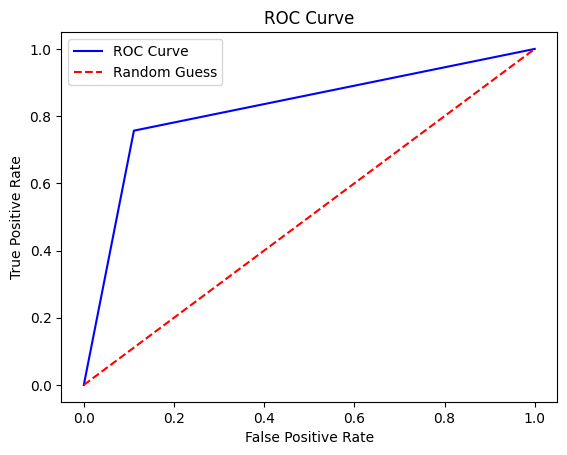

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [20]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8228228228228228


In [21]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)


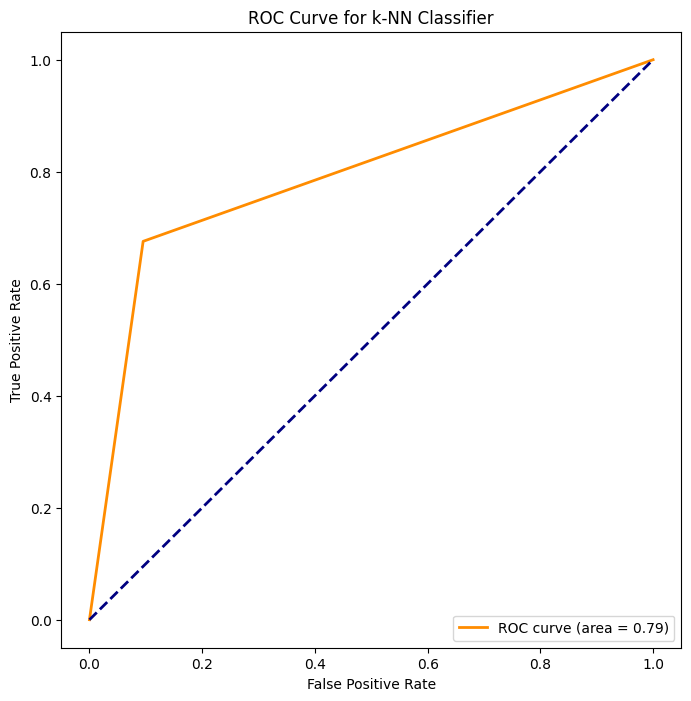

In [30]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-NN Classifier')
plt.legend(loc="lower right")
plt.show()